# Практическая работа №1
## Анализ данных мониторинга и моделирования для городов, часть 1


In [19]:
!git clone https://github.com/mvarentsov/Urban-climate-modelling4HSE.git

fatal: destination path 'Urban-climate-modelling4HSE' already exists and is not an empty directory.


In [24]:
import sys
sys.path.insert(0, 'Urban-climate-modelling4HSE/Practice')

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import meteo_utils

## Чтение данных из архива RP5, первичный просмотр

(0.0, 30.0)

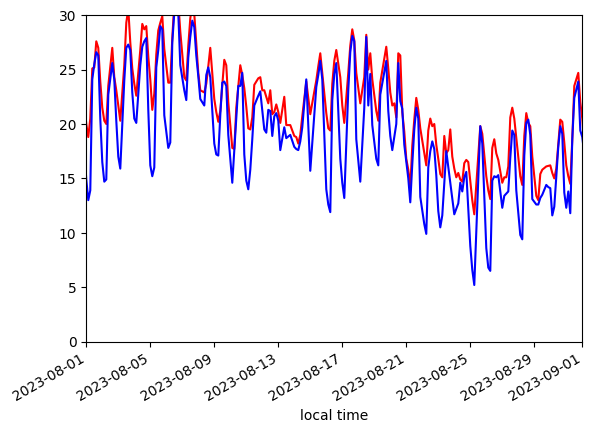

In [27]:
path_urb = 'Urban-climate-modelling4HSE/Practice/PW1_data/Moscow_rp5/27605.31.10.2012.21.01.2024.1.0.0.ru.utf8.00000000.xls'
path_rur = 'Urban-climate-modelling4HSE/Practice/PW1_data/Moscow_rp5/27518.31.10.2012.21.01.2024.1.0.0.ru.utf8.00000000.xls'


df_urb = meteo_utils.read_rp5 (path_urb)
df_rur = meteo_utils.read_rp5 (path_rur)

df_urb['T'].plot(color = 'red')
df_rur['T'].plot(color = 'blue')
plt.xlim([pd.Timestamp(2023,8,1),pd.Timestamp(2023,9,1)])
plt.ylim([0, 30])


## Объединение данных двух станций в одни DataFrame

,"Местное время в Москве (центр, Балчуг)",T_urb,Po_urb,P_urb,Pa_urb,U_urb,DD_urb,Ff_urb,ff10_urb,ff3_urb,...,Ch_rur,VV_rur,Td_rur,RRR_rur,tR_rur,E_rur,Tg_rur,E'_rur,sss_rur,delta_T
local time,,,,,,,,,,,,,,,,,,,,,
2024-01-21 21:00:00,21.01.2024 21:00,-9.4,763.6,776.0,NaN,77.0,"Ветер, дующий с северо-запада",2.0,NaN,NaN,...,NaN,14,-13.9,Осадков нет,12.0,NaN,NaN,NaN,NaN,3.6
2024-01-21 18:00:00,21.01.2024 18:00,-9.9,762.4,774.8,NaN,76.0,"Ветер, дующий с западо-северо-запада",1.0,NaN,NaN,...,NaN,17,-17.5,Осадков нет,12.0,NaN,NaN,NaN,NaN,6.6
2024-01-21 15:00:00,21.01.2024 15:00,-9.5,761.0,773.3,NaN,70.0,"Ветер, дующий с западо-северо-запада",1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-21 12:00:00,21.01.2024 12:00,-10.1,759.9,772.3,NaN,71.0,"Ветер, дующий с запада",1.0,NaN,NaN,...,NaN,13,-13.1,NaN,NaN,NaN,NaN,NaN,NaN,1.8
2024-01-21 09:00:00,21.01.2024 09:00,-11.1,758.5,770.8,NaN,74.0,"Ветер, дующий с северо-запада",1.0,NaN,NaN,...,NaN,14,-21.9,0.1,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,31,9.2


<Axes: xlabel='local time'>

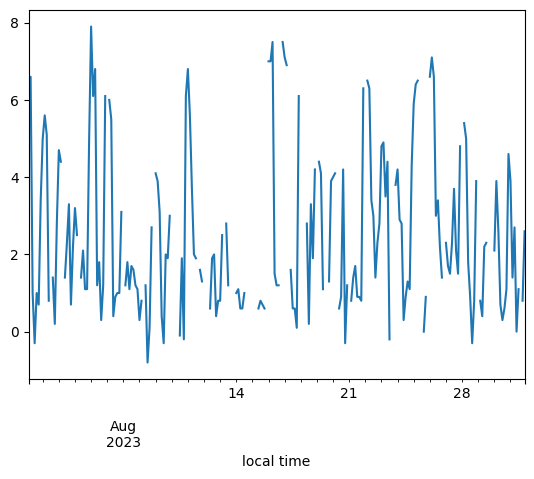

In [28]:
df_merged = df_urb.merge(df_rur, how = 'outer', on='local time', suffixes=('_urb', '_rur'))
df_merged['delta_T'] = df_merged['T_urb'] - df_merged['T_rur']

display(df_merged.head())

df_resampled = df_merged.resample('3h').asfreq()

df_cropped = df_resampled[(df_resampled.index > pd.Timestamp (2023, 8, 1))
                        & (df_resampled.index < pd.Timestamp (2023, 9, 1))]


df_cropped['delta_T'].plot()



## Чтение данных из архива "Погода и климат", первичный просмотр

reading PW1_data\Moscow_weaclim\27605\27605_202301.html
reading PW1_data\Moscow_weaclim\27605\27605_202302.html
reading PW1_data\Moscow_weaclim\27605\27605_202303.html
reading PW1_data\Moscow_weaclim\27605\27605_202304.html
reading PW1_data\Moscow_weaclim\27605\27605_202305.html
reading PW1_data\Moscow_weaclim\27605\27605_202306.html
reading PW1_data\Moscow_weaclim\27605\27605_202307.html
reading PW1_data\Moscow_weaclim\27605\27605_202308.html
reading PW1_data\Moscow_weaclim\27605\27605_202309.html
reading PW1_data\Moscow_weaclim\27605\27605_202310.html
reading PW1_data\Moscow_weaclim\27605\27605_202311.html
reading PW1_data\Moscow_weaclim\27605\27605_202312.html


Index(['Ветер (напр.,м/с)', 'Ветер (напр.,м/с)', 'Видим.', 'Явления',
       'Облачность', 'Т(С)', 'Тd(С)', 'f(%)', 'Тe(С)', 'Тes(С)',
       'Комфортность', 'P(гПа)', 'Po(гПа)', 'Тmin(С)', 'Tmax(С)', 'R(мм)',
       'R24(мм)', 'S(см)'],
      dtype='object', name=0)

,"Ветер (напр.,м/с)","Ветер (напр.,м/с)",Видим.,Явления,Облачность,Т(С),Тd(С),f(%),Тe(С),Тes(С),Комфортность,P(гПа),Po(гПа),Тmin(С),Tmax(С),R(мм),R24(мм),S(см)
UTC time,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,Ю,1,4000 м,NaN,10 баллов,+1.7,-0.1,88,-0,-0,NaN,1012.9,997.3,NaN,NaN,NaN,NaN,NaN
2023-01-01 03:00:00,З,1,4000 м,NaN,10 баллов,+1.8,+0.3,90,0,0,NaN,1010.2,994.7,+1.2,NaN,0.3,NaN,NaN
2023-01-01 06:00:00,ЮЗ,1,4000 м,NaN,10 баллов,+2.2,+0.7,90,0,0,NaN,1008.8,993.3,+1.2,NaN,0.3,NaN,NaN
2023-01-01 09:00:00,ЮЗ,1,4000 м,NaN,10 баллов,+3.1,+1.8,91,+1,+1,NaN,1006.1,990.7,NaN,NaN,NaN,NaN,NaN
2023-01-01 12:00:00,З,1,4000 м,NaN,10 баллов,+4.0,+2.7,91,+2,+2,NaN,1004.6,989.3,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='UTC time'>

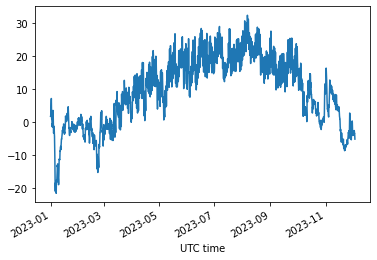

In [ ]:
path = r'PW1_data\Moscow_weaclim\27605\*2023*.html'

df = meteo_utils.read_weaclim_dir (path)
display(df.columns)
display(df.head())
df['Т(С)'].astype('float').plot()
